**Prompt:**
Write code in python to generate the data for X an y where y = 3x - 4 + random noise You can use numpy.

https://chatgpt.com/share/68c4e8ba-9240-8010-84f1-3567f4031f2f

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 data points for X
X = np.linspace(0, 10, 100)

# Generate random noise (normal distribution with mean 0 and std deviation 1)
noise = np.random.normal(0, 1, X.shape)

# Generate y values
y = 3 * X - 4 + noise

# Plot to visualize
plt.scatter(X, y, label="Data with noise")
plt.plot(X, 3*X - 4, color="red", label="True line (no noise)")
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

Create a function predict that takes X and weights w and gives y by y = w.X. add column of 1s for bias before doing w.X

In [5]:
import numpy as np
A = np.array([[1, 1],[1, 2],[1, 3]])
w = np.array([5, 6])

In [6]:
A @ w

array([11, 17, 23])

In [11]:
for _, x in A.astype(int):
    print(x * w[1] + w[0])

11
17
23


In [4]:
A.reshape(-1, 1)

array([[1],
       [2],
       [3]])

In [ ]:
[]

In [15]:


def predict(X, w):
    """
    Predicts y = w.X after adding a bias column of 1s to X.

    Parameters:
        X : numpy array of shape (n_samples, n_features)
            Input features
        w : numpy array of shape (n_features + 1,)
            Weights (including bias as last element)

    Returns:
        y : numpy array of shape (n_samples,)
            Predicted values
    """
    # Ensure X is 2D
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    # Add column of 1s for bias
    X_bias = np.hstack([X, np.ones((X.shape[0], 1))])

    # Compute y = X_bias @ w
    y = X_bias @ w
    return y


# Example usage:
np.random.seed(42)
X = np.linspace(0, 10, 5)  # 5 points
w = np.array([3, -4])      # slope=3, bias=-4

y_pred = predict(X, w)
print("X:\n", X)
print("Predicted y:\n", y_pred)


X:
 [ 0.   2.5  5.   7.5 10. ]
Predicted y:
 [-4.   3.5 11.  18.5 26. ]


Now, define an error function which takes the following arguments: training Data X, training labels y, weights W, loss function loss. It should first use our predict function to calculate ppred and then calculate the overall loss by using the loss on ypred, y

In [18]:
import numpy as np

def error(X, y, w, loss):
    """
    Compute error using a given loss function.

    Parameters:
        X : numpy array of shape (n_samples, n_features)
            Training data
        y : numpy array of shape (n_samples,)
            Training labels
        w : numpy array of shape (n_features + 1,)
            Weights (including bias)
        loss : function
            A function that takes (y_true, y_pred) and returns scalar loss

    Returns:
        total_loss : float
            Overall loss value
    """
    # Predict using our linear model
    ypred = predict(X, w)

    # Compute and return loss
    return loss(y, ypred)


# Example loss functions
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


In [22]:
# Example usage
np.random.seed(42)
X = np.linspace(0, 10, 20)
w = np.array([4, -4])   # slope=3, bias=-4
y = 3 * X - 4 + np.random.normal(0, 1, X.shape)  # training labels with noise

print("MSE:", error(X, y, w, mse))
print("MAE:", error(X, y, w, mae))


MSE: 40.31319347685648
MAE: 5.220969976742952


In [8]:
error(X, y, [2, 3], mse)

11.315869092156497

Write a function 'gradient' to compute the gradient of a loss function 'loss' wrt to each weight at given X, y, weights.

In [31]:
import numpy as np

def gradient(X, y, w, loss, error=error,eps=1e-6):
    """
    Compute numerical gradient of loss wrt weights.

    Parameters:
        X : numpy array of shape (n_samples, n_features)
            Training data
        y : numpy array of shape (n_samples,)
            Training labels
        w : numpy array of shape (n_features + 1,)
            Weights (including bias)
        loss : function
            A function that takes (y_true, y_pred) and returns scalar loss
        eps : float
            Small epsilon for numerical approximation

    Returns:
        grad : numpy array of shape (n_features + 1,)
            Gradient of loss wrt each weight
    """
    grad = np.zeros_like(w, dtype=float)

    # Current loss
    base_loss = error(X, y, w, loss)

    # Finite difference approximation
    for i in range(len(w)):
        w_perturbed = w.copy()
        w_perturbed[i] += eps
        loss_perturbed = error(X, y, w_perturbed, loss)
        grad[i] = (loss_perturbed - base_loss) / eps

    return grad


# Example usage
np.random.seed(42)
X = np.linspace(0, 10, 20)
y = 3 * X - 4 + np.random.normal(0, 1, X.shape)
w = np.array([0.0, 0.0])   # initial guess

g = gradient(X, y, w, mse)
print("Gradient at w =", w, "is", g)

Gradient at w = [0. 0.] is [-160.06537157  -21.6574019 ]


Define a function learners that takes X, y, error(), predict(), loss(). It assumes somes values of W. Computes the gradiants using above function and then uses gradient descent to optimize the values of weights.  and it returns the weights.

In [32]:
ww = np.array([1., 2.])
gg = np.array([10., -15.])
eta = .001
ww -= eta * gg
ww

array([0.99 , 2.015])

In [35]:
import numpy as np
# assuming predict(), error(), loss (e.g., mse), and gradient() are already defined

def learners(X, y, error_fn, predict_fn, loss_fn, lr=0.01, epochs=1000, tol=1e-8, w_init=None, verbose=False):
    """
    Optimize weights with gradient descent and return the learned weights.

    Parameters:
        X : (n_samples, n_features) or (n_samples,)
        y : (n_samples,)
        error_fn : function(X, y, w, loss_fn) -> float
            Overall loss calculator (uses predict_fn internally if your version supports it).
        predict_fn : function(X, w) -> y_pred
            Not used directly here (error_fn uses it), included for API symmetry as requested.
        loss_fn : function(y_true, y_pred) -> float
        lr : float
            Learning rate.
        epochs : int
            Max iterations.
        tol : float
            Stop if ||grad||_2 < tol.
        w_init : np.ndarray or None
            Initial weights (length = n_features + 1). If None, initialized to zeros.
        verbose : bool
            If True, prints progress.

    Returns:
        w : np.ndarray of shape (n_features + 1,)
            Learned weights (including bias as last term).
    """
    # Ensure shapes
    X = np.asarray(X)
    y = np.asarray(y)

    if X.ndim == 1:
        X = X.reshape(-1, 1)

    n_features = X.shape[1]
    w = np.zeros(n_features + 1) if w_init is None else np.asarray(w_init, dtype=float)

    for t in range(epochs):
        g = gradient(X, y, w, loss_fn)  # numerical gradient wrt each weight
        w = w - lr * g

        # Convergence check
        g_norm = np.linalg.norm(g, ord=2)
        if verbose and (t % max(1, epochs // 10) == 0 or g_norm < tol):
            curr_loss = error_fn(X, y, w, loss_fn)
            print(f"iter {t:4d} | loss={curr_loss:.6f} | ||grad||={g_norm:.3e}")
            print(w)

        if g_norm < tol:
            break

    return w


# ---- Example usage ----
# Define a simple MSE if you don't already have one
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Synthetic data
# np.random.seed(42)
# X_demo = np.linspace(0, 10, 50)
# noise = np.random.normal(0, 1, X_demo.shape)
# y_demo = 3 * X_demo - 4 + noise

X_demo, y_demo = X, y
# Learn weights starting from zeros
w_learned = learners(
    X_demo, y_demo,
    error_fn=error,          # uses your previously defined error()
    predict_fn=predict,      # included for API symmetry
    loss_fn=mse,
    lr=0.01,
    epochs=2000,
    tol=1e-8,
    w_init=None,
    verbose=True
)

print("Learned weights [slope, bias]:", w_learned)


iter    0 | loss=20.841098 | ||grad||=1.615e+02
[1.60065372 0.21657402]
iter  200 | loss=0.954206 | ||grad||=6.595e-01
[ 2.62947046 -1.99413598]
iter  400 | loss=0.595257 | ||grad||=2.292e-01
[ 2.74780622 -2.79756406]
iter  600 | loss=0.551913 | ||grad||=7.964e-02
[ 2.7889268  -3.07674789]
iter  800 | loss=0.546679 | ||grad||=2.767e-02
[ 2.80321582 -3.17376169]
iter 1000 | loss=0.546047 | ||grad||=9.616e-03
[ 2.80818113 -3.20747309]
iter 1200 | loss=0.545970 | ||grad||=3.341e-03
[ 2.80990652 -3.21918749]
iter 1400 | loss=0.545961 | ||grad||=1.161e-03
[ 2.81050608 -3.22325813]
iter 1600 | loss=0.545960 | ||grad||=4.035e-04
[ 2.81071442 -3.22467265]
iter 1800 | loss=0.545960 | ||grad||=1.402e-04
[ 2.81078682 -3.22516418]
Learned weights [slope, bias]: [ 2.81081191 -3.2253345 ]


Plot X, y along with a line represented by w.

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def plot_xy_with_line(X, y, w, title="Data & Fitted Line"):
    """
    Plots X vs y as scatter and overlays the line represented by weights w.
    Assumes a single feature: y = w[0]*x + w[1].

    Parameters:
        X : array-like, shape (n_samples,) or (n_samples, 1)
        y : array-like, shape (n_samples,)
        w : array-like, shape (2,) -> [slope, bias]
    """
    X = np.asarray(X)
    y = np.asarray(y).ravel()

    # Ensure single feature
    if X.ndim == 2:
        if X.shape[1] != 1:
            raise ValueError("plot_xy_with_line supports only 1 feature (X shape must be (n, ) or (n, 1)).")
        x1d = X.ravel()
    else:
        x1d = X

    # Build a smooth line over the X range
    x_line = np.linspace(x1d.min(), x1d.max(), 200)
    y_line = w[0] * x_line + w[1]

    plt.figure()
    plt.scatter(x1d, y, label="Data")
    plt.plot(x_line, y_line, label=f"Line: y = {w[0]:.3f}x + {w[1]:.3f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()



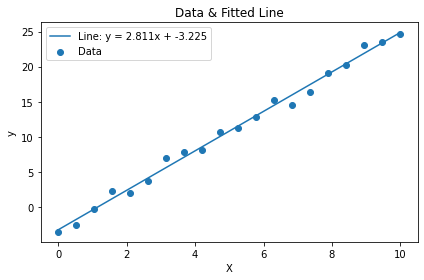

In [37]:
plot_xy_with_line(X_demo, y_demo, w_learned)

# Or with known weights:
# w_true = np.array([3.0, -4.0])
# plot_xy_with_line(X_demo, y_demo, w_true)


Now, generate a dataset for classification, say X is age of people and y represents is_adult. The people above 18 are considered adult 

In [39]:
import numpy as np

def make_is_adult(n=200, min_age=0, max_age=80, seed=42, integer=True, flip_rate=0.0):
    """
    Generate a classification dataset: X = age, y = is_adult (1 if age > 18 else 0).

    Parameters:
        n         : number of samples
        min_age   : minimum possible age (inclusive)
        max_age   : maximum possible age (inclusive if integer=True)
        seed      : RNG seed for reproducibility
        integer   : if True, ages are integers; else float ages
        flip_rate : fraction of labels to randomly flip (simulate noise)

    Returns:
        X : np.ndarray shape (n,) of ages
        y : np.ndarray shape (n,) of 0/1 labels
    """
    rng = np.random.default_rng(seed)
    if integer:
        X = rng.integers(min_age, max_age + 1, size=n)
    else:
        X = rng.uniform(min_age, max_age, size=n)

    y = (X > 18).astype(int)  # strictly "above 18" => adult

    if flip_rate > 0:
        flip_mask = rng.random(n) < flip_rate
        y[flip_mask] = 1 - y[flip_mask]

    return X, y


# Example usage
if __name__ == "__main__":
    X, y = make_is_adult(n=20, flip_rate=0.0)
    print("Ages (X):", X)
    print("is_adult (y):", y)
    print("Adults count:", y.sum(), "/", len(y))


Ages (X): [ 7 62 53 35 35 69  6 56 16  7 42 79 59 61 58 63 41 10 68 36]
is_adult (y): [0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1]
Adults count: 15 / 20


Write code to generate the data using this function and plot it. Y axis is for is_adult or not. X_axis the age

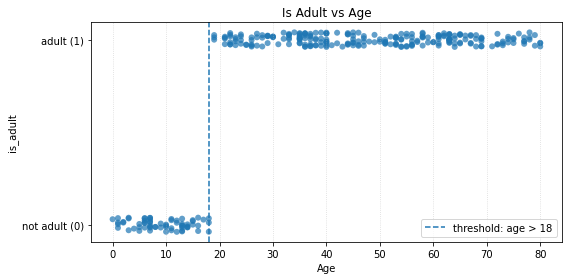

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# --- assumes make_is_adult() from earlier is already defined ---
# from your previous cell:
# def make_is_adult(n=200, min_age=0, max_age=80, seed=42, integer=True, flip_rate=0.0): ...

# Generate data
X, y = make_is_adult(n=300, min_age=0, max_age=80, seed=42, integer=True, flip_rate=0.0)

# OPTIONAL: jitter y slightly so overlapping points are easier to see
y_plot = y + np.random.uniform(-0.04, 0.04, size=y.shape)

# Plot
plt.figure(figsize=(8, 4))
plt.scatter(X, y_plot, alpha=0.7, edgecolor="none")
plt.axvline(18, linestyle="--", label="threshold: age > 18")

plt.yticks([0, 1], ["not adult (0)", "adult (1)"])
plt.xlabel("Age")
plt.ylabel("is_adult")
plt.title("Is Adult vs Age")
plt.legend()
plt.grid(axis="x", linestyle=":", alpha=0.5)
plt.tight_layout()
plt.show()


Use the learners() function to learn from this using the mse and plot the result.

Learned weights [slope, bias]: [0.01729062 0.04898052]


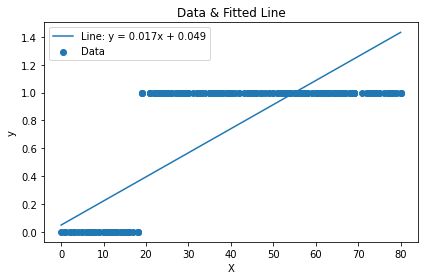

In [41]:
X, y = make_is_adult(n=300, min_age=0, max_age=80, seed=42, integer=True, flip_rate=0.0)

# Learn linear model with MSE
w_learned = learners(
    X, y,
    error_fn=error,
    predict_fn=predict,
    loss_fn=mse,
    lr=1e-4,        # small LR for stability with numerical gradients
    epochs=5000,
    tol=1e-8,
    w_init=None,
    verbose=False
)
print("Learned weights [slope, bias]:", w_learned)

# Plot result
plot_xy_with_line(X, y, w_learned)

Create logloss function for binary classification loss. Now, using the 'learners' function defined above and using logloss function learn the weights from X, y (from is_adult dataset)

Learned weights (logistic): [slope, bias] = [ 0.19414998 -3.06686889]


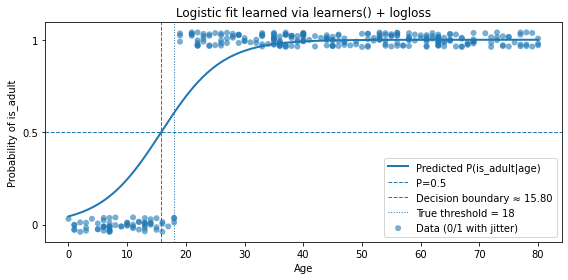

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# --- Assume these already exist from earlier: make_is_adult, predict, error, gradient, learners ---

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def logloss(y_true, y_linear):
    """
    Binary cross-entropy. Expects *linear* predictions; applies sigmoid inside.
    y_true in {0,1}
    """
    y_true = np.asarray(y_true).astype(float)
    p = sigmoid(np.asarray(y_linear))
    eps = 1e-12
    p = np.clip(p, eps, 1 - eps)
    return -np.mean(y_true * np.log(p) + (1 - y_true) * np.log(1 - p))


# --- Generate data ---
X, y = make_is_adult(n=300, min_age=0, max_age=80, seed=42, integer=True, flip_rate=0.0)

# --- Learn weights with logloss (logistic regression via numerical gradient) ---
w_log = learners(
    X, y,
    error_fn=error,         # uses predict() -> linear output
    predict_fn=predict,     # included for API symmetry
    loss_fn=logloss,        # applies sigmoid internally
    lr=1e-2,                # tune if needed
    epochs=6000,
    tol=1e-8,
    w_init=None,
    verbose=False
)

print("Learned weights (logistic): [slope, bias] =", w_log)

# --- Optional: visualize probability curve and decision boundary ---
ages = np.linspace(X.min(), X.max(), 400)
probs = sigmoid(predict(ages.reshape(-1, 1), w_log))
x0 = -w_log[1] / w_log[0]  # 0.5-probability threshold

# Jitter the y for visibility (0/1 points)
y_jitter = y + np.random.uniform(-0.04, 0.04, size=y.shape)

plt.figure(figsize=(8, 4))
plt.scatter(X, y_jitter, alpha=0.6, edgecolor="none", label="Data (0/1 with jitter)")
plt.plot(ages, probs, label="Predicted P(is_adult|age)", linewidth=2)
plt.axhline(0.5, linestyle="--", linewidth=1, label="P=0.5")
plt.axvline(x0, linestyle="--", linewidth=1, label=f"Decision boundary ≈ {x0:.2f}")
plt.axvline(18, linestyle=":", linewidth=1, label="True threshold = 18")
plt.yticks([0, 0.5, 1], ["0", "0.5", "1"])
plt.xlabel("Age")
plt.ylabel("Probability of is_adult")
plt.title("Logistic fit learned via learners() + logloss")
plt.legend()
plt.tight_layout()
plt.show()


Generate the data from a slab based calculation like tax. if the salary is less than 1000, the tax is 0 other wise tax rate is 30%

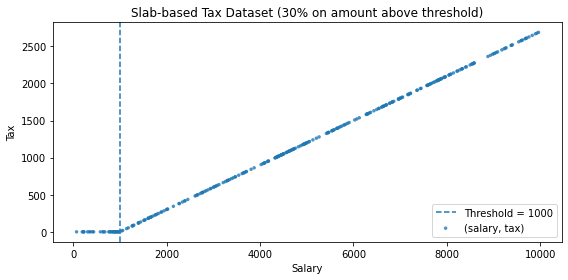

In [44]:
#Here’s a tiny, vectorized NumPy helper to generate a **slab-based tax dataset**.

#Assumption: the 30% tax applies **only to the amount above the threshold** (classic slab). You can flip a flag to apply 30% to the whole salary instead.

import numpy as np
import matplotlib.pyplot as plt

def make_tax_dataset(
    n=300,
    min_salary=0,
    max_salary=10000,
    threshold=1000,
    rate=0.30,
    apply_on_excess=True,   # True: tax on (salary - threshold); False: tax on full salary once threshold crossed
    integer=True,
    seed=42
):
    """
    Generate (X, y) where:
      X = salary
      y = tax payable under a simple slab rule:
          - if salary < threshold: tax = 0
          - else:
              apply_on_excess=True  -> tax = rate * (salary - threshold)
              apply_on_excess=False -> tax = rate * salary
    """
    rng = np.random.default_rng(seed)
    if integer:
        X = rng.integers(min_salary, max_salary + 1, size=n)
    else:
        X = rng.uniform(min_salary, max_salary, size=n)

    if apply_on_excess:
        y = rate * np.clip(X - threshold, a_min=0, a_max=None)
    else:
        y = np.where(X < threshold, 0.0, rate * X)

    return X, y

# ---- Example usage + plot ----
X, y = make_tax_dataset(n=300, min_salary=0, max_salary=10000, threshold=1000, rate=0.30, apply_on_excess=True)

plt.figure(figsize=(8, 4))
plt.scatter(X, y, s=12, alpha=0.8, edgecolor="none", label="(salary, tax)")
plt.axvline(1000, linestyle="--", label="Threshold = 1000")
plt.xlabel("Salary")
plt.ylabel("Tax")
plt.title("Slab-based Tax Dataset (30% on amount above threshold)")
plt.legend()
plt.tight_layout()
plt.show()

# * `X` is the salary array; `y` is the corresponding tax.
# * Set `apply_on_excess=False` if you want 30% on the **entire** salary once it crosses the threshold.


write code to train a regressor using mse in learners() on this X and y and show draw the line on the plot along with X, y

Learned weights [slope, bias]: [ 0.25379426 -0.02351921]


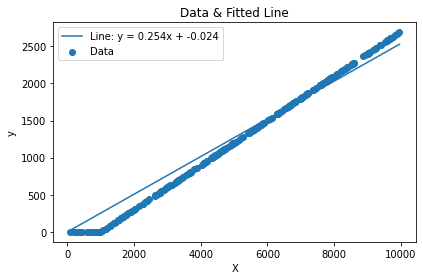

In [45]:
X, y = make_tax_dataset(n=300, min_salary=0, max_salary=10000,
                        threshold=1000, rate=0.30, apply_on_excess=True)

# Learn linear regressor with MSE
w_learned = learners(
    X, y,
    error_fn=error,
    predict_fn=predict,
    loss_fn=mse,
    lr=1e-8,         # small LR because salaries/taxes are large-magnitude
    epochs=20000,
    tol=1e-8,
    w_init=None,
    verbose=False
)
print("Learned weights [slope, bias]:", w_learned)

# Plot data and fitted line
plot_xy_with_line(X, y, w_learned)

come up with a new label y_is_taxable and train a classifier using learners() method on X, and y_is_taxable

In [48]:
threshold = 1000
y_is_taxable = (y > 0).astype(int)

# Scale feature for stable/fast optimization (keeps learners() unchanged)
scale = 1000.0
X_scaled = X / scale

w_cls = learners(
    X_scaled, y_is_taxable,
    error_fn=error,
    predict_fn=predict,
    loss_fn=logloss,
    lr=2e-2,        # works well after scaling
    epochs=6000,
    tol=1e-8,
    w_init=None,
    verbose=False
)

Learned weights (on scaled X): [slope, bias] = [ 2.36712029 -2.18103891]
Estimated decision boundary ≈ 921.39 (true threshold = 1000)


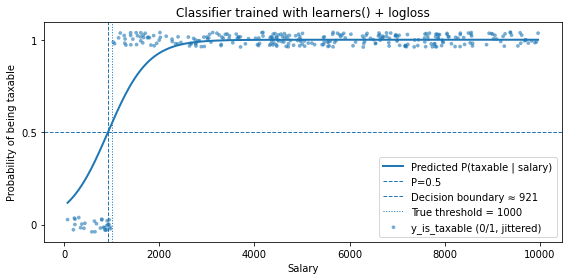

In [49]:
print("Learned weights (on scaled X): [slope, bias] =", w_cls)

# Decision boundary (P=0.5): w0 * x_scaled + b = 0  =>  x_scaled = -b/w0  =>  x = scale * x_scaled
x0_scaled = -w_cls[1] / (w_cls[0] + 1e-12)
x0 = x0_scaled * scale
print(f"Estimated decision boundary ≈ {x0:.2f} (true threshold = {threshold})")

# ---------- Visualize ----------
xs = np.linspace(X.min(), X.max(), 500)
ps = sigmoid(predict((xs/scale).reshape(-1, 1), w_cls))

# Jitter labels for visibility
y_jitter = y_is_taxable + np.random.uniform(-0.04, 0.04, size=y_is_taxable.shape)

plt.figure(figsize=(8, 4))
plt.scatter(X, y_jitter, alpha=0.6, edgecolor="none", s=14, label="y_is_taxable (0/1, jittered)")
plt.plot(xs, ps, linewidth=2, label="Predicted P(taxable | salary)")
plt.axhline(0.5, linestyle="--", linewidth=1, label="P=0.5")
plt.axvline(x0, linestyle="--", linewidth=1, label=f"Decision boundary ≈ {x0:.0f}")
plt.axvline(threshold, linestyle=":", linewidth=1, label=f"True threshold = {threshold}")
plt.yticks([0, 0.5, 1], ["0", "0.5", "1"])
plt.xlabel("Salary")
plt.ylabel("Probability of being taxable")
plt.title("Classifier trained with learners() + logloss")
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
X1

array([[8.920e+02, 0.000e+00],
       [7.740e+03, 1.000e+00],
       [6.546e+03, 1.000e+00],
       [4.389e+03, 1.000e+00],
       [4.330e+03, 1.000e+00],
       [8.586e+03, 1.000e+00],
       [8.590e+02, 0.000e+00],
       [6.974e+03, 1.000e+00],
       [2.014e+03, 1.000e+00],
       [9.410e+02, 1.000e+00],
       [5.265e+03, 1.000e+00],
       [9.757e+03, 1.000e+00],
       [7.358e+03, 1.000e+00],
       [7.612e+03, 1.000e+00],
       [7.175e+03, 1.000e+00],
       [7.861e+03, 1.000e+00],
       [5.132e+03, 1.000e+00],
       [1.281e+03, 1.000e+00],
       [8.398e+03, 1.000e+00],
       [4.504e+03, 1.000e+00],
       [5.004e+03, 1.000e+00],
       [3.708e+03, 1.000e+00],
       [1.825e+03, 1.000e+00],
       [9.268e+03, 1.000e+00],
       [7.816e+03, 1.000e+00],
       [6.439e+03, 1.000e+00],
       [4.024e+03, 1.000e+00],
       [8.228e+03, 1.000e+00],
       [5.454e+03, 1.000e+00],
       [4.434e+03, 1.000e+00],
       [4.505e+03, 1.000e+00],
       [2.272e+03, 1.000e+00],
       [

In [38]:
y

array([   0. , 2022. , 1663.8, 1016.7,  999. , 2275.8,    0. , 1792.2,
        304.2,    0. , 1279.5, 2627.1, 1907.4, 1983.6, 1852.5, 2058.3,
       1239.6,   84.3, 2219.4, 1051.2, 1201.2,  812.4,  247.5, 2480.4,
       2044.8, 1631.7,  907.2, 2168.4, 1336.2, 1030.2, 1051.5,  381.6,
          0. , 1363.8, 2363.7,    0. , 2274.9, 2183.1,  530.1, 1595.1,
        195.6, 1974.3, 1801.5,  763.5,    0. , 2612.1, 1037.1, 2379.6,
       1733.7, 2035.2, 1979.7,  283.8,  791.7, 1100.1, 1193.4,    0. ,
       1339.8,  162.9, 1930.2, 1749.3, 2467.8, 1934.4,  799.8, 2602.8,
        932.4,  677.4, 2416.8,  811.2,    0. , 1108.8, 2087.1,  268.2,
       1088.7,   89.7, 1759.5, 1127.1,  690.6,  380.7, 1393.5, 1709.4,
       2521.2, 1011.3,  182.1, 2198.1, 1589.4, 1800.9,    0. ,  636.9,
       2003.7, 2196.9, 1005.6, 2114.4, 2225.1,  862.5, 2394.3,  564.9,
        418.5, 1747.5, 1610.4,  119.1, 2198.4,  299.7, 2114.7,    0. ,
       2090.7, 2061. , 2041.2, 1694.7, 1114.8, 1815.6,  531.3, 2042.4,
      

Regressor weights [w_salary, w_is_taxable, bias]: [ 2.18210786e+12 -6.46004957e+02 -6.45901102e+02]


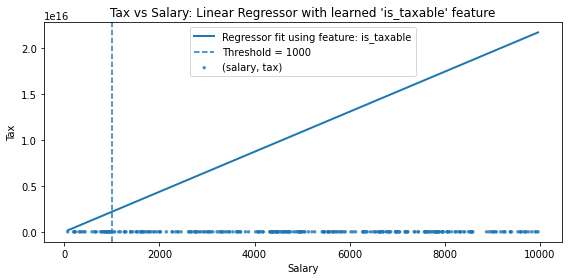

In [36]:
scores = predict(X_scaled.reshape(-1, 1), w_cls)
is_taxable_hat = (sigmoid(scores) >= 0.5).astype(float)

# 3) Create X1 = [salary, is_taxable_hat] and train a regressor with MSE
X1 = np.column_stack([X, is_taxable_hat])
w_reg = learners(
    X1, y,
    error_fn=error,
    predict_fn=predict,
    loss_fn=mse,
    lr=0.000001, epochs=30000, tol=1e-8, verbose=False
)
print("Regressor weights [w_salary, w_is_taxable, bias]:", w_reg)

# 4) Plot data and fitted line (use classifier to compute is_taxable feature along the x-grid)
x_line = np.linspace(X.min(), X.max(), 500)
is_taxable_line = (sigmoid(predict((x_line/scale).reshape(-1,1), w_cls)) >= 0.5).astype(float)
X1_line = np.column_stack([x_line, is_taxable_line])
y_line = predict(X1_line, w_reg)

plt.figure(figsize=(8, 4))
plt.scatter(X, y, s=12, alpha=0.8, edgecolor="none", label="(salary, tax)")
plt.plot(x_line, y_line, linewidth=2, label="Regressor fit using feature: is_taxable")
plt.axvline(threshold, linestyle="--", label=f"Threshold = {threshold}")
plt.xlabel("Salary")
plt.ylabel("Tax")
plt.title("Tax vs Salary: Linear Regressor with learned 'is_taxable' feature")
plt.legend()
plt.tight_layout()
plt.show()